In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder

post_vacc_inf = pd.read_csv("../data/Post-Vaccination_Infection_Data.csv")

vacc_prog = pd.read_csv("../data/Vaccine_Progress_Dashboard_Data.csv")

## Vaccination_Progress_Data study

In [2]:
# This table shows stats of vaccination progress for counties in california state.
vacc_prog

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag,booster_recip_count,cumulative_booster_recip_count
0,Alameda,2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
1,Alameda,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
2,Alameda,2020-07-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0
3,Alameda,2020-07-29,0,1,0,0,0,1,0,0,0,0,0,0,0,1,NaN,0,0
4,Alameda,2020-07-30,0,1,0,0,0,1,0,0,0,0,0,0,0,1,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36575,Yuba,2022-03-02,95,91335,49,36992,37,47266,1,4706,23,3839,22,37875,23,41803,California,49,15506
36576,Yuba,2022-03-03,97,91432,41,37033,31,47297,2,4708,18,3857,43,37918,18,41821,California,35,15541
36577,Yuba,2022-03-04,82,91514,39,37072,35,47332,0,4708,11,3868,26,37944,11,41832,California,45,15586
36578,Yuba,2022-03-05,42,91556,19,37091,11,47343,0,4708,11,3879,16,37960,11,41843,California,15,15601


In [7]:
# It is a daily data from 2021-01-05 to 2022-03-06
# March 2022 data also available online
vacc_prog['administered_date'].value_counts()

2020-01-05    62
2021-09-03    62
2021-08-18    62
2021-08-19    62
2021-08-20    62
              ..
2021-02-07    62
2021-02-08    62
2021-02-09    62
2021-02-10    62
2022-03-06    62
Name: administered_date, Length: 590, dtype: int64

In [5]:
# Check for missing data
for column in vacc_prog.columns:
    count = vacc_prog[column].isnull().sum()
    if count > 0:
      print(f'{column} has {count} missing data')
    
# Only California flag column has missing data, can drop the column

california_flag has 8871 missing data


In [6]:
# Data type on the table looks already cleaned
vacc_prog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36580 entries, 0 to 36579
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   county                          36580 non-null  object
 1   administered_date               36580 non-null  object
 2   total_doses                     36580 non-null  int64 
 3   cumulative_total_doses          36580 non-null  int64 
 4   pfizer_doses                    36580 non-null  int64 
 5   cumulative_pfizer_doses         36580 non-null  int64 
 6   moderna_doses                   36580 non-null  int64 
 7   cumulative_moderna_doses        36580 non-null  int64 
 8   jj_doses                        36580 non-null  int64 
 9   cumulative_jj_doses             36580 non-null  int64 
 10  partially_vaccinated            36580 non-null  int64 
 11  total_partially_vaccinated      36580 non-null  int64 
 12  fully_vaccinated                36580 non-null

cumulative data does not privode much information, therefore can drop them.

In [10]:
vacc_prog_by_date = vacc_prog.groupby('administered_date', as_index=False).sum()

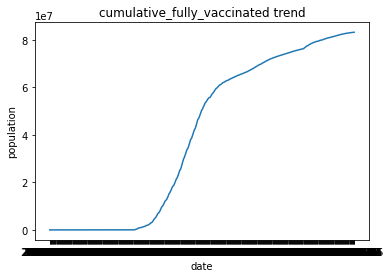

In [22]:
plt.plot(vacc_prog_by_date['administered_date'], vacc_prog_by_date['cumulative_fully_vaccinated'])
plt.title('cumulative_fully_vaccinated trend')
plt.xlabel('date')
plt.ylabel('population')
plt.show()

In [12]:
vacc_prog_by_date['moderna_doses'].sum()

79940217

In [21]:
vacc_prog_by_date['cumulative_moderna_doses'].tail(1)

589    79940217
Name: cumulative_moderna_doses, dtype: int64

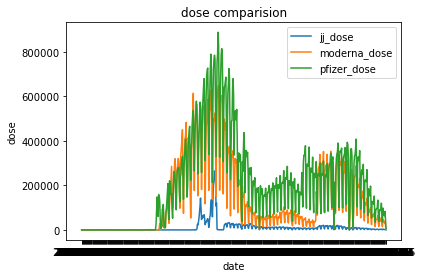

In [26]:
plt.plot(vacc_prog_by_date['administered_date'], vacc_prog_by_date['jj_doses'], label='jj_dose')
plt.plot(vacc_prog_by_date['administered_date'], vacc_prog_by_date['moderna_doses'], label='moderna_dose')
plt.plot(vacc_prog_by_date['administered_date'], vacc_prog_by_date['pfizer_doses'], label='pfizer_dose')
plt.title('dose comparision')
plt.xlabel('date')
plt.ylabel('dose')
plt.legend()
plt.show()